# Assignment - Computer Vision - Flower Class Prediction

### Notes
1. This is a supplement to the Google Colab notebook named "Assignment - Computer Vision". The purpose of this notebook is to provide a GUI for uploading an image and predicting the class of a flower. 
2. The notebook "Assignment - Computer Vision" is used to train a Flower Image classifier and save the weights of the best model (using Transfer Learning). 
3. The weights saved therein are named "flower_weights". These weights are loaded into this notebook to reconstruct the network to be used for prediction
4. I have used two different notebooks to complete the assignment because I cannot use tkinter to launch the GUI for prediction from Google Colab Notebook.

#### Import the required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger('tensorflow').disabled = True

import matplotlib.pyplot as plt
import numpy as np

import tensorflow
tensorflow.__version__
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg19 import VGG19
from keras.preprocessing import image

import tkinter as tk
from tkinter import ttk
import re
from tkinter import filedialog
from PIL import ImageTk,Image  

Using TensorFlow backend.


#### Center all image displays

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

1. Construct a skeleton model skeleton similar to the one used for training 
2. Load the weights from the saved weights file. The weights file must be named "flower_weights" generated by the Colab Notebook "Assignment - Computer Vision". This is the best performing model using Transfer Learning
3. Display the model summary 

In [3]:
base_model = VGG19(include_top=False,weights="imagenet",
                   input_tensor=None, 
                   input_shape=(224, 224, 3),
                   pooling='avg')

new_model = Sequential([base_model,
                        Flatten(),
                        Dense(32, activation='relu'),
                        Dense(17, activation='softmax'),
                        ])

new_model.load_weights("D:/flower_weights")

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 512)               20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                16416     
_________________________________________________________________
dense_1 (Dense)              (None, 17)                561       
Total params: 20,041,361
Trainable params: 20,041,361
Non-trainable params: 0
_________________________________________________________________


#### Construct a Flower class array, similar to the one used in "Assignment - Computer Vision"

In [4]:
flower_classes = ['Daffodil',
                  'Snowdrop', 
                  'Daisy', 
                  'Colts Foot',
                  'Dandelion',
                  'Cowslip', 
                  'Buttercup', 
                  'Windflower', 
                  'Pansy',
                  'Lily Valley', 
                  'Bluebell',
                  'Crocus', 
                  'Iris',
                  'Tigerlily',
                  'Tulip',
                  'Fritillary', 
                  'Sunflower'] 

#### We write two functions for 
1. Given a file location in the local machine, load it from the file system and return its corresponding image array
2. Given an image array, predict the class of the flower, which is one of the 17 classes in the list "flower_classes"

In [5]:
def load_image(imagepath):

    # Read the image
    img = image.load_img(imagepath, target_size=(224,224))
    test_image = image.img_to_array(img)
    test_image = np.expand_dims(test_image,axis=0)
    return img, test_image
    
def predict_flower(testimg,testimgarray):
    
    result = new_model.predict(testimgarray)
    flower_class = np.argmax(result,axis=1)[0]

    fig=plt.figure(figsize=(10,5))
    title = 'Predicted Class:'+flower_classes[flower_class]+" [Class "+str(flower_class)+"]"

    plt.subplot(121),plt.imshow(testimg),plt.title(title,fontdict = {'fontsize' : 16, 'color':'blue','fontweight':'bold'})
    plt.xticks([]), plt.yticks([])

    plt.show()
    
    return flower_classes[flower_class]+" [Class "+str(flower_class)+"]"

#### This module is used to launch a GUI to be used to predict the folowr class. The instructions for using the GUI are as follows
The following actions can be performed
1. Import Image - Click this to locate a flower image from the file system. When clicked, it
    a. Confirms that the file has been uploaded 
    b. Displays the uploaded image
    c. Supports the upload of images with extension ".jpg" and ".png"
2. Predict Flower Type - Click this to get the flower class. When clicked, it 
    a. Sends the uploaded image to "predict_flower" function to make a prediction
    b. The precited class is shown in the GUI and in the notebook output
3. Use "Close Window" to close the GUI 

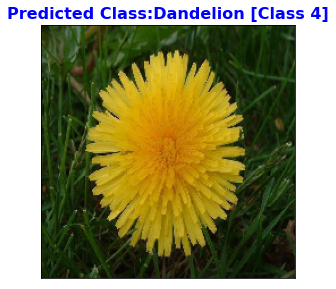

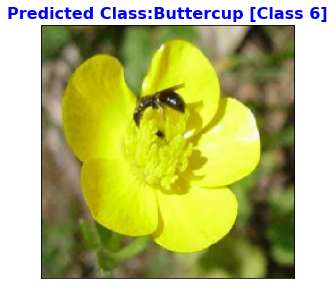

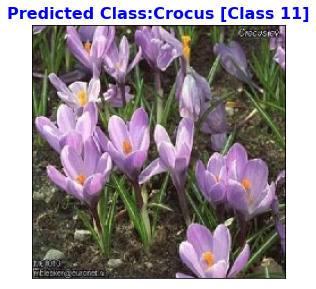

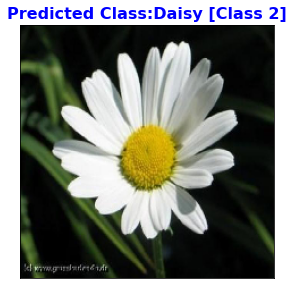

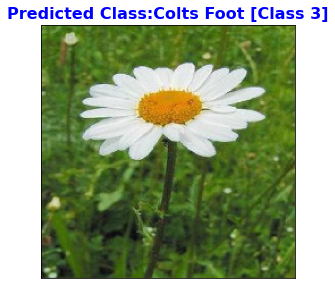

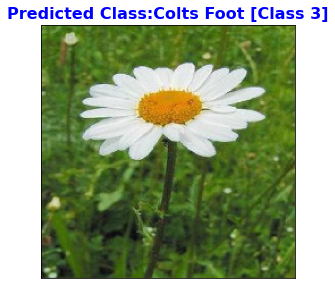

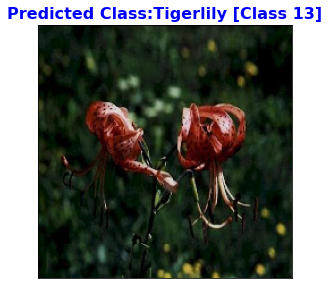

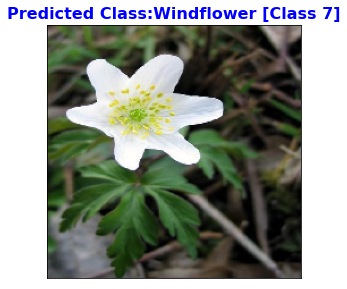

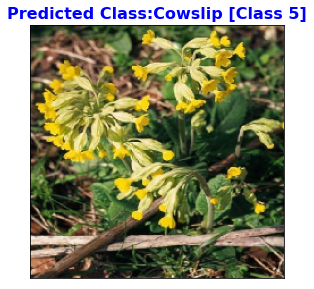

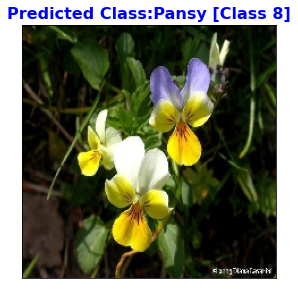

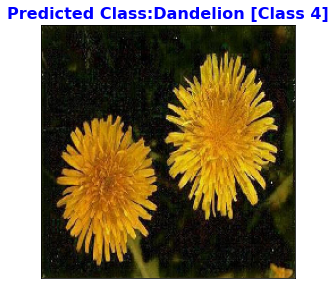

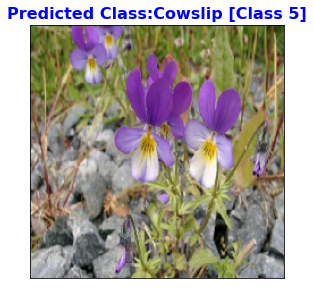

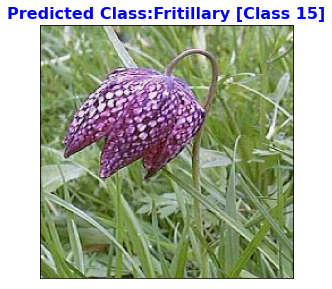

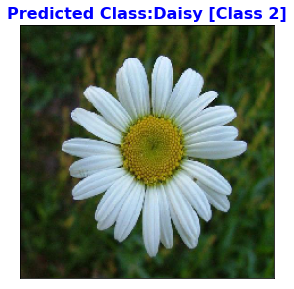

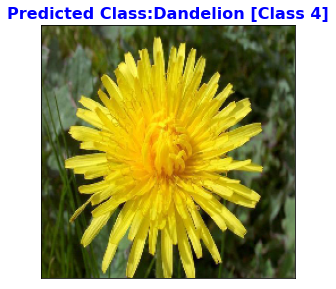

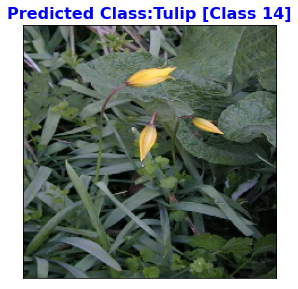

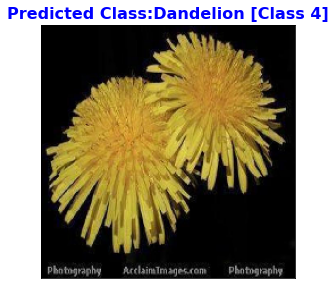

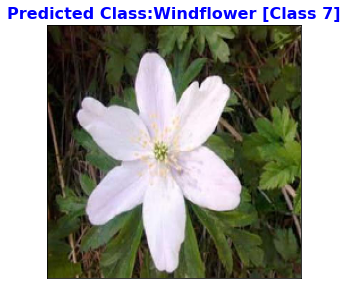

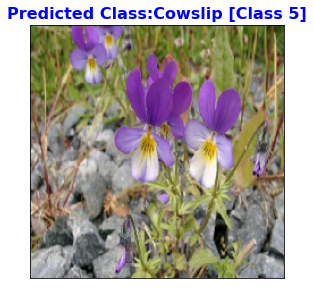

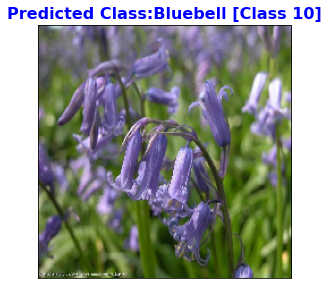

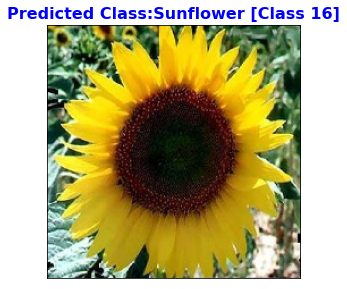

In [6]:
if __name__ == "__main__": 
    # create a GUI window 
    win = tk.Tk() 
    # set the background colour of GUI window 
    win.configure(background="gray") 
 
    # set the title of GUI window 
    win.title("Classifier GUI - Great Learning") 
 
    # set the configuration of GUI window 
    win.geometry("1000x500") 
    
    class_label = ttk.Label(win,width=32,text="")

    #File Name
    filename = ttk.Label(win,width=30,text="Provide full path to image")
    filename.grid(row=0,column=0,sticky=tk.W)
    
    def UploadAction(event=None):
        filename = filedialog.askopenfilename(filetypes=[("Images", ".jpg .png")])
        global testimg
        global testimgarray
        global Confirm_entrybox
        
        testimg, testimgarray = load_image(filename)
        
        if class_label.winfo_exists():
            class_label.destroy()
        
        confirm=filename+" Loaded "
        Confirm_entrybox=ttk.Label(win,width=50, text=confirm)
        Confirm_entrybox.grid(row=0,column=4,sticky=tk.W)
        
        size=(250,250)
        render = ImageTk.PhotoImage(Image.open(filename).resize(size))
        img = ttk.Label(win, image=render)
        img.image = render
        img.place(x=500, y=200)

    Import_Data_Button = ttk.Button(win, width=20,text='Import Image',command=UploadAction)
    Import_Data_Button.grid(row=0,column=2,sticky=tk.W)
    
    def Predict():
        global flower_type
        global class_label

        flower_type = predict_flower(testimg,testimgarray)
        Confirm_entrybox.destroy()
        class_label = ttk.Label(win,width=32,text="This flower is a "+flower_type)
        class_label.grid(row=4,column=4,sticky=tk.W)

    Predict_Button = ttk.Button(win,width=20, text='Predict Flower Type',command=Predict)
    Predict_Button.grid(row=4,column=2, sticky=tk.W)
    

    def Close_All():
        win.destroy()

    Exit_Button = ttk.Button(win, width=20,text='Close Window',command=Close_All)
    Exit_Button.grid(row=6,column=2,sticky=tk.W)

    # start the GUI 
    win.mainloop()